# **Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import functions
import importlib
importlib.reload(functions)

import warnings

# **Display**

In [2]:
%matplotlib inline

pd.options.display.max_rows = 300000
pd.options.display.max_columns = 999
pd.options.display.max_colwidth = 500

warnings.filterwarnings("ignore")
warnings.simplefilter(action="ignore", category=FutureWarning)

pd.set_option('display.max_rows', 200)

size = 20

## **Colors**

In [39]:
color_1 = "bisque"
color_2 = "crimson"
color_3 = "orangered"
color_4 = "lightcoral"
color_5 = "royalblue"
color_6 = "indianred"
color_7 = "slategrey"
color_8 = "salmon"
color_9 = "beige"
color_10 = "coral"
color_11 = "grey"
color_12 = "tan"
color_13 = "wheat"
color_14 = "tomato"

In [40]:
size = 20

params = {
    "font.family": "Times New Roman",
    "font.size": size,
    "axes.labelsize": size,
    "xtick.labelsize": size * 0.75,
    "ytick.labelsize": size * 0.75,
    "figure.titlesize": size * 1.5,
    "axes.titlesize": size * 1.5,
    "axes.titlepad": size,
    "axes.labelpad": size - 10,
    "lines.linewidth": 2,
    "axes.spines.top": False,
    "axes.spines.right": False,
    "axes.spines.left": False,
    "axes.spines.bottom": False,
    "legend.fontsize": size,
    "figure.figsize": (10, 6),
}

# **Data**

## **Load Data**

In [25]:
train = pd.read_csv(
    r"C:\Users\Dell\Documents\AI\Risk\Data\Data\train 20.csv",
    index_col=False
)

In [26]:
train.head()
    

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,AGE,YEARS_EMPLOYED,YEARS_REGISTRATION,YEARS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,YEARS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_11,FLAG_DOCUMENT_18,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018800,25.920548,1.745205,9.99,5.808219,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.0830,0.2630,0.1394,0.0247,0.0369,0.972,0.619,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.972,0.6343,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.972,0.6245,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,3.107,1,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003542,45.931507,3.254795,3.25,0.797260,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.3113,0.6220,NaN,0.0959,0.0529,0.985,0.796,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.985,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.985,0.7990,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,2.268,1,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010030,52.180822,0.616438,11.67,6.934247,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.5560,0.7295,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,2.232,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondar

## **Reduce Memory Usage**

In [27]:
train = functions.reduce_memory_usage(train)

Memory usage of dataframe is 260.42 MB
Memory usage after optimization is: 88.57 MB
Decreased by 66.0%


# **Exploratory Data Analysis**

## **Target Disbribution**

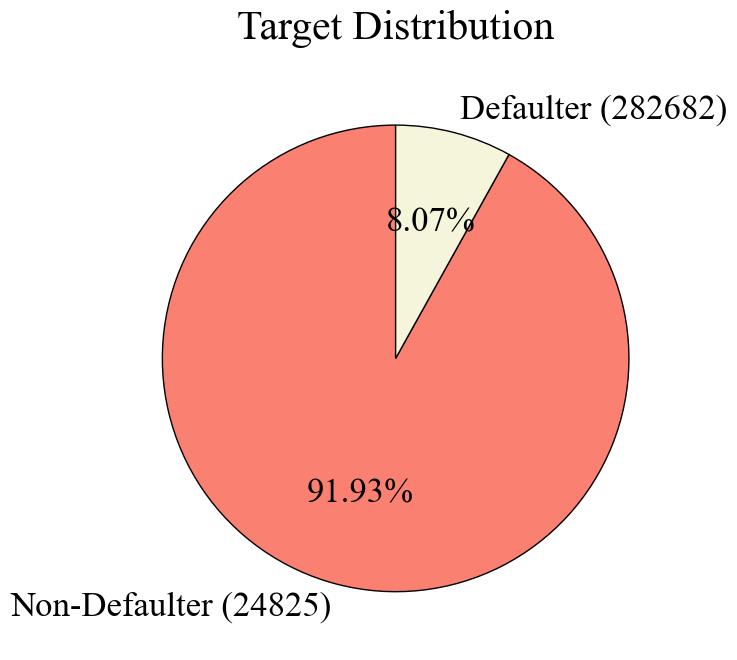

In [28]:
data = train['TARGET'].value_counts()
colors = [color_8, color_9]
labels = [f'Non-Defaulter ({data[1]})', f'Defaulter ({data[0]})']
title = "Target Distribution"

functions.piechart(data, title, colors, labels, size)

## **Column Types**

In [29]:
train.dtypes.value_counts()

float64    59
int8       26
object     16
float32     5
float16     4
int32       1
Name: count, dtype: int64

## **Unique Values in Categorical Columns**

In [30]:
functions.UniqueValues(train)

NAME_CONTRACT_TYPE: 2
CODE_GENDER: 2
FLAG_OWN_CAR: 2
FLAG_OWN_REALTY: 2
NAME_TYPE_SUITE: 8
NAME_INCOME_TYPE: 8
NAME_EDUCATION_TYPE: 5
NAME_FAMILY_STATUS: 6
NAME_HOUSING_TYPE: 6
OCCUPATION_TYPE: 19
WEEKDAY_APPR_PROCESS_START: 7
ORGANIZATION_TYPE: 58
FONDKAPREMONT_MODE: 5
HOUSETYPE_MODE: 4
WALLSMATERIAL_MODE: 8
EMERGENCYSTATE_MODE: 3


## **Age**

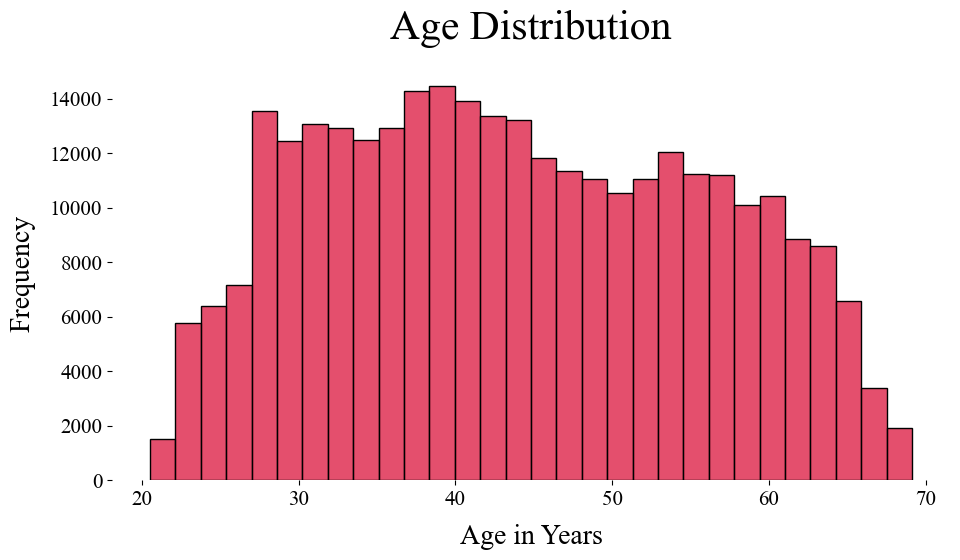

In [29]:
data = train
column = 'AGE'
title = 'Age Distribution'
color = color_2
x_label = 'Age in Years'
y_label = 'Frequency'
bins = 30

functions.histplot(data, column, title, color, x_label, y_label, bins)

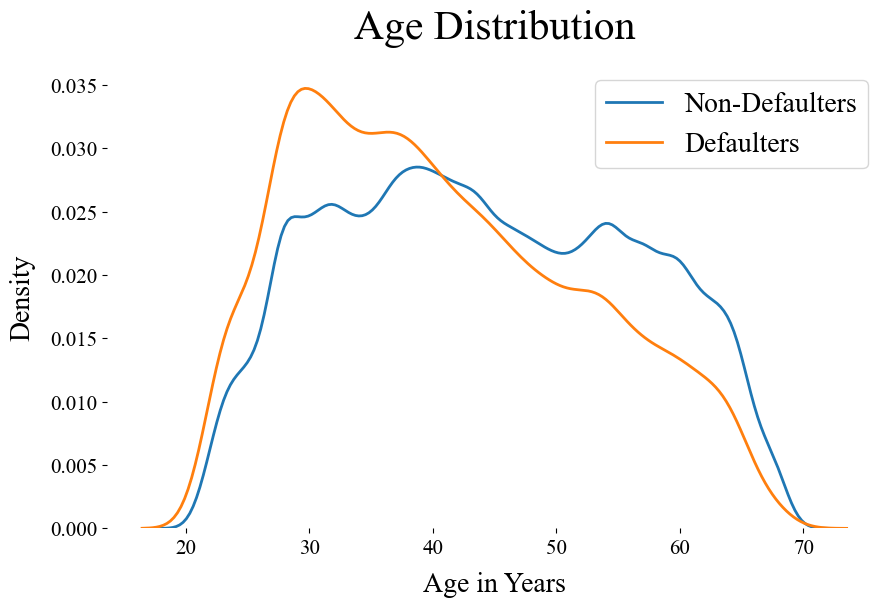

In [9]:
plt.figure(figsize=(10,6))

sns.kdeplot(train.loc[train['TARGET'] == 0, 'AGE'], label='Non-Defaulters')
sns.kdeplot(train.loc[train['TARGET'] == 1, 'AGE'], label='Defaulters')

plt.title('Age Distribution');
plt.xlabel('Age in Years');
plt.ylabel('Density');
plt.legend();

## **Gender**

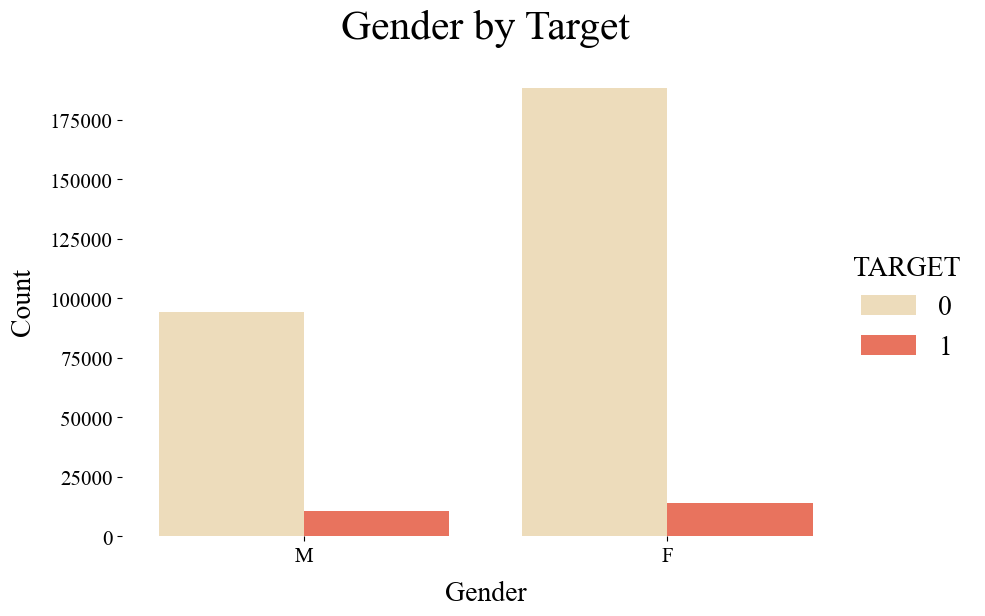

In [30]:
g = sns.catplot(data=train, x='CODE_GENDER', hue='TARGET', kind='count', height=6, aspect=1.5, palette=[color_13, color_14])

for ax in g.axes.flat:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)

plt.title('Gender by Target')
plt.xlabel('Gender')
plt.ylabel('Count')

plt.show()

## **Employment**

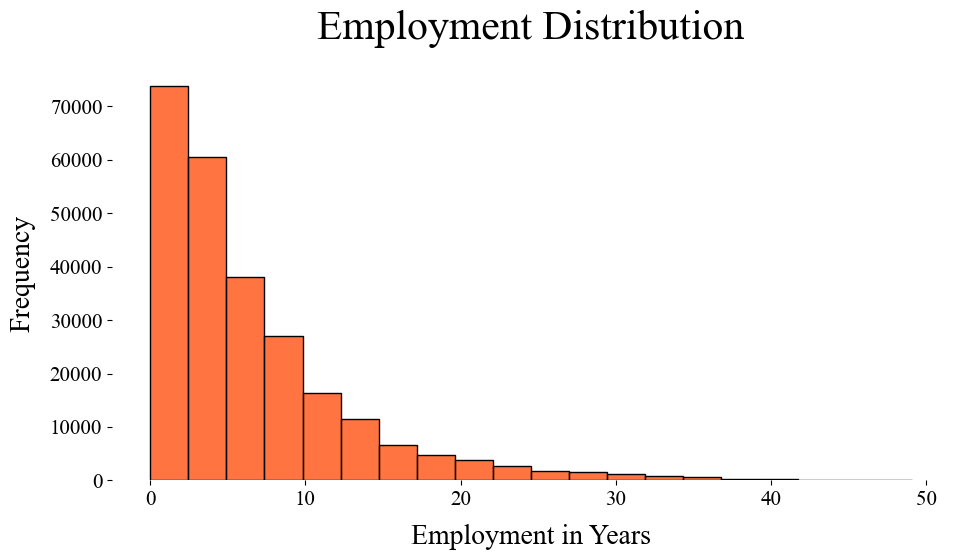

In [31]:
data = train
column = 'YEARS_EMPLOYED'
title = 'Employment Distribution'
color = color_3
x_label = 'Employment in Years'
y_label = 'Frequency'
bins = 20

functions.histplot(data, column, title, color, x_label, y_label, bins)

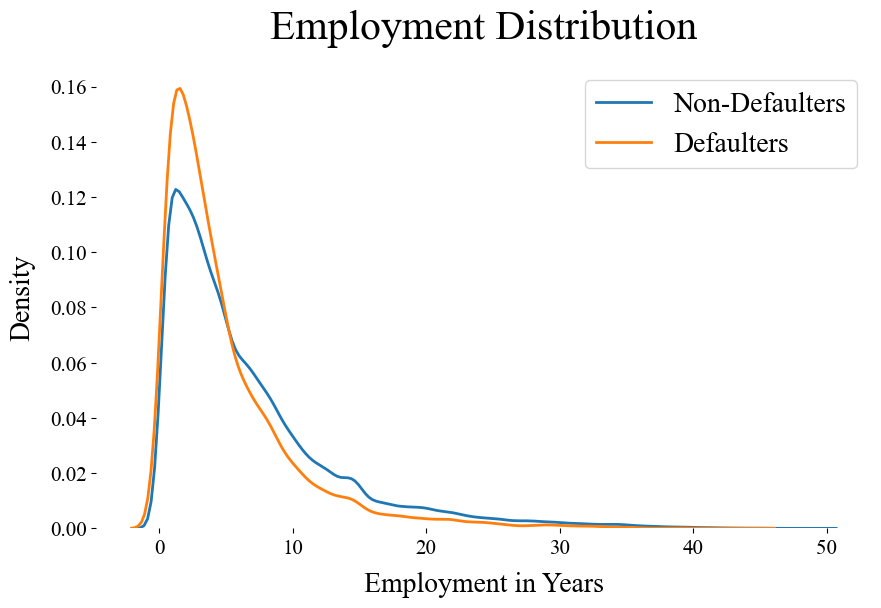

In [32]:
plt.figure(figsize=(10,6))

sns.kdeplot(train.loc[train['TARGET'] == 0, 'YEARS_EMPLOYED'], label='Non-Defaulters')
sns.kdeplot(train.loc[train['TARGET'] == 1, 'YEARS_EMPLOYED'], label='Defaulters')

plt.title('Employment Distribution');
plt.xlabel('Employment in Years');
plt.ylabel('Density');
plt.legend();

## **Family Status**

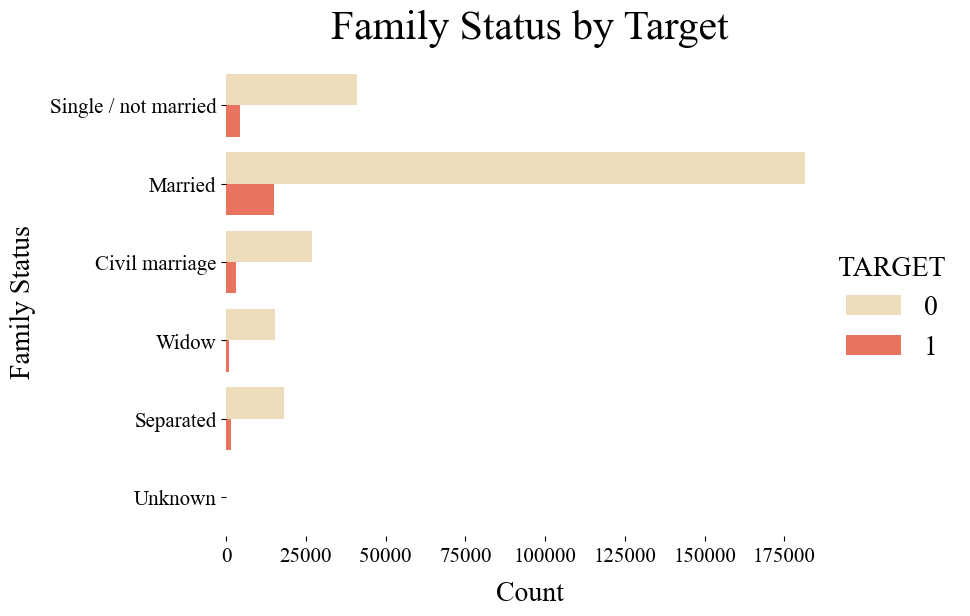

In [33]:
g = sns.catplot(data=train, y='NAME_FAMILY_STATUS', hue='TARGET', kind='count', height=6, aspect=1.5, palette=[color_13, color_14])

for ax in g.axes.flat:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)

plt.title('Family Status by Target')
plt.xlabel('Count')
plt.ylabel('Family Status')

plt.show()

## **Number of Children**

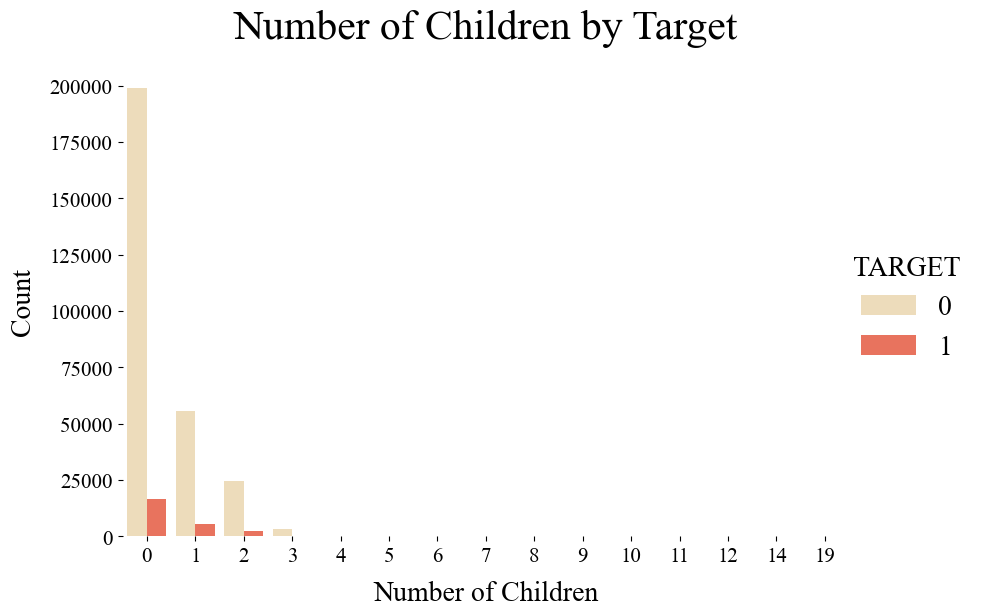

In [34]:
g = sns.catplot(data=train, x='CNT_CHILDREN', hue='TARGET', kind='count', height=6, aspect=1.5, palette=[color_13, color_14])

for ax in g.axes.flat:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)

plt.title('Number of Children by Target')
plt.xlabel('Number of Children')
plt.ylabel('Count')

plt.show()

## **Education Type**

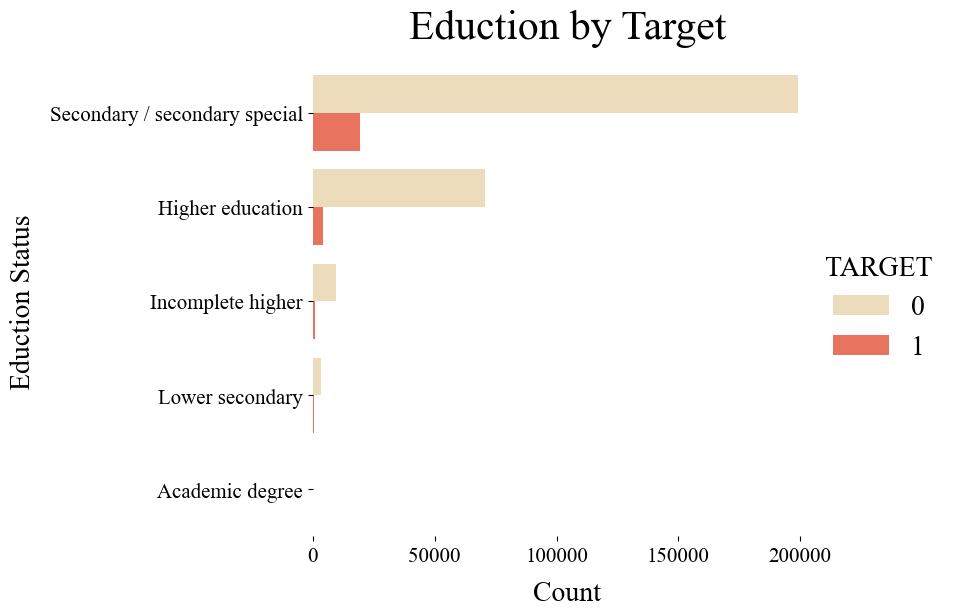

In [35]:
g = sns.catplot(data=train, y='NAME_EDUCATION_TYPE', hue='TARGET', kind='count', height=6, aspect=1.5, palette=[color_13, color_14])

for ax in g.axes.flat:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)

plt.title('Eduction by Target')
plt.xlabel('Count')
plt.ylabel('Eduction Status')

plt.show()

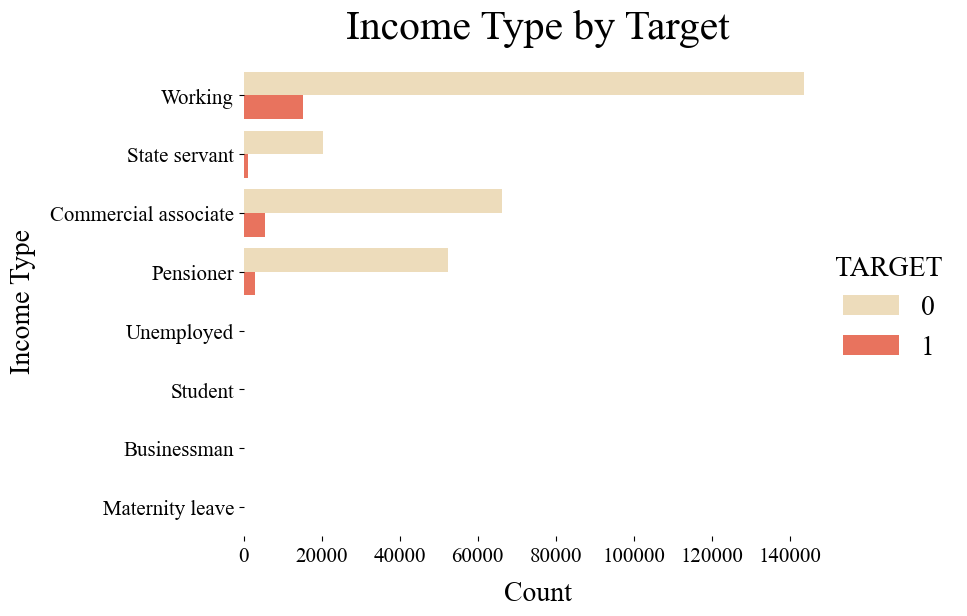

In [67]:
g = sns.catplot(data=train, y='NAME_INCOME_TYPE', hue='TARGET', kind='count', height=6, aspect=1.5, palette=[color_13, color_14])

for ax in g.axes.flat:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)

plt.title('Income Type by Target')
plt.xlabel('Count')
plt.ylabel('Income Type')

plt.show()

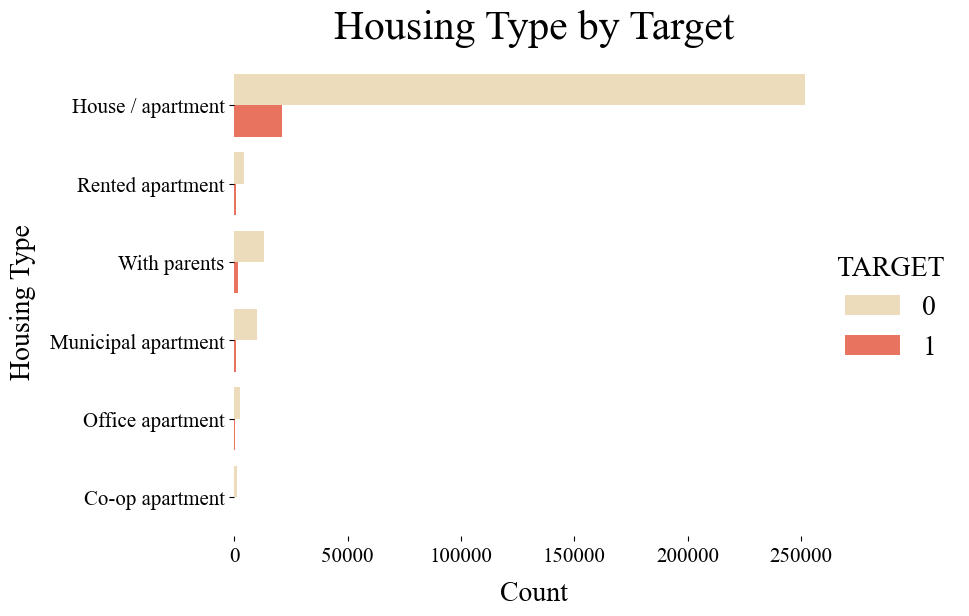

In [69]:
g = sns.catplot(data=train, y='NAME_HOUSING_TYPE', hue='TARGET', kind='count', height=6, aspect=1.5, palette=[color_13, color_14])

for ax in g.axes.flat:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)

plt.title('Housing Type by Target')
plt.xlabel('Count')
plt.ylabel('Housing Type')

plt.show()

## **Distribution of Loan Amounts by Default Status**

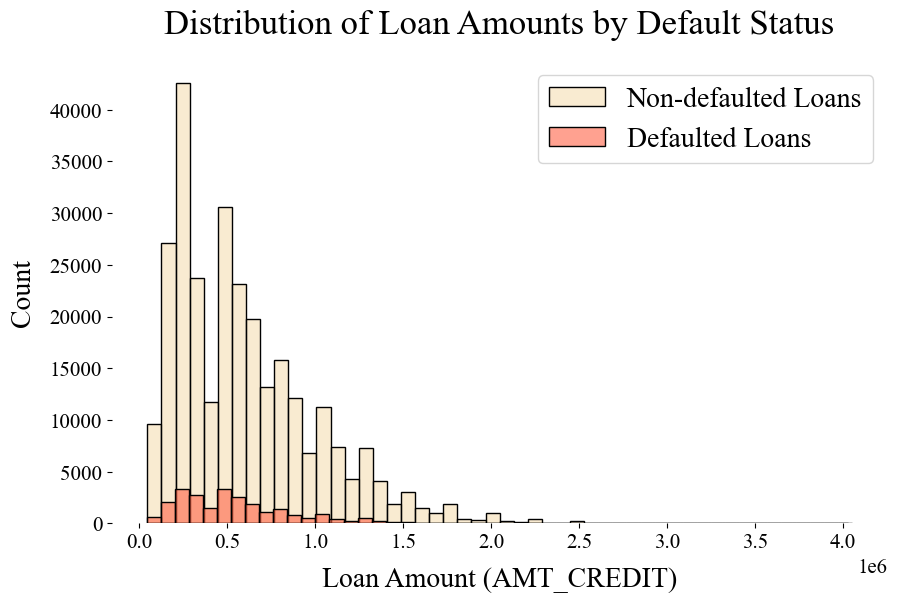

In [64]:
data = train

defaulted_loans = data[data['TARGET'] == 1]['AMT_CREDIT']
non_defaulted_loans = data[data['TARGET'] == 0]['AMT_CREDIT']

plt.figure(figsize=(10, 6))

sns.histplot(non_defaulted_loans, color=color_13, kde=False, bins=50, label='Non-defaulted Loans', alpha=0.6)

sns.histplot(defaulted_loans, color=color_14, kde=False, bins=50, label='Defaulted Loans', alpha=0.6)

plt.title('Distribution of Loan Amounts by Default Status', fontsize=size+5)
plt.xlabel('Loan Amount (AMT_CREDIT)', fontsize=size)
plt.ylabel('Count', fontsize=size)
plt.legend()

plt.show()


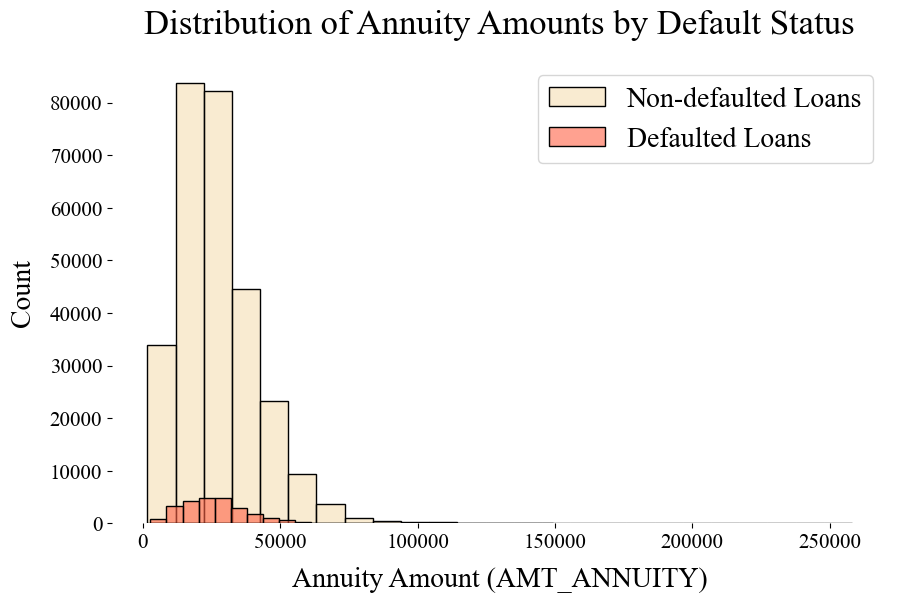

In [78]:
data = train

defaulted_loans = data[data['TARGET'] == 1]['AMT_ANNUITY']
non_defaulted_loans = data[data['TARGET'] == 0]['AMT_ANNUITY']

plt.figure(figsize=(10, 6))

sns.histplot(non_defaulted_loans, color=color_13, kde=False, bins=25, label='Non-defaulted Loans', alpha=0.6)

sns.histplot(defaulted_loans, color=color_14, kde=False, bins=25, label='Defaulted Loans', alpha=0.6)

plt.title('Distribution of Annuity Amounts by Default Status', fontsize=size+5)
plt.xlabel('Annuity Amount (AMT_ANNUITY)', fontsize=size)
plt.ylabel('Count', fontsize=size)
plt.legend()

plt.show()


# **Correlations**

## **Label Encoder**

In [49]:
data_type = 'object'
train = functions.label_encoder(train, data_type)

## **Correlation Coefficient**

In [51]:
corr_matrix = data.corr(numeric_only=True)
corr_matrix['TARGET'].sort_values(ascending=True)

EXT_SOURCE_3                   -0.178926
EXT_SOURCE_2                   -0.160470
EXT_SOURCE_1                   -0.155318
AGE                            -0.078242
YEARS_LAST_PHONE_CHANGE        -0.055219
YEARS_ID_PUBLISH               -0.051458
FLOORSMAX_AVG                  -0.044008
FLOORSMAX_MEDI                 -0.043773
FLOORSMAX_MODE                 -0.043231
YEARS_REGISTRATION             -0.041976
AMT_GOODS_PRICE                -0.039547
REGION_POPULATION_RELATIVE     -0.037229
HOUSETYPE_MODE                 -0.036388
ELEVATORS_AVG                  -0.034202
ELEVATORS_MEDI                 -0.033866
FLOORSMIN_AVG                  -0.033620
FLOORSMIN_MEDI                 -0.033401
LIVINGAREA_AVG                 -0.033002
LIVINGAREA_MEDI                -0.032744
FLOORSMIN_MODE                 -0.032704
TOTALAREA_MODE                 -0.032598
ELEVATORS_MODE                 -0.032135
NAME_CONTRACT_TYPE             -0.030886
ORGANIZATION_TYPE              -0.030767
LIVINGAREA_MODE 

## **Spearman Correlation**

In [58]:
functions.spearman_correlation(train, 'TARGET')

                          Feature  Spearman Correlation
41                   EXT_SOURCE_2             -0.146675
42                   EXT_SOURCE_3             -0.121136
16                            AGE             -0.078331
94        YEARS_LAST_PHONE_CHANGE             -0.053710
19               YEARS_ID_PUBLISH             -0.052535
50                  FLOORSMAX_AVG             -0.049234
78                 FLOORSMAX_MEDI             -0.049179
64                 FLOORSMAX_MODE             -0.048999
87                 TOTALAREA_MODE             -0.048475
40                   EXT_SOURCE_1             -0.048351
54                 LIVINGAREA_AVG             -0.046858
82                LIVINGAREA_MEDI             -0.046736
68                LIVINGAREA_MODE             -0.046219
48                  ELEVATORS_AVG             -0.045987
43                 APARTMENTS_AVG             -0.045902
76                 ELEVATORS_MEDI             -0.045885
71                APARTMENTS_MEDI             -0

## **Phi-K Correlation Coefficient Matrix**

In [ ]:
phik_matrix = data.phik_matrix()

feature_target_corr = phik_matrix['TARGET'].drop('TARGET')  
print("Phi-K Correlation of Features with Target:\n", feature_target_corr)

## **Sorted Results**

In [ ]:
phik_matrix = train.phik_matrix()

feature_target_corr = phik_matrix['TARGET'].drop('TARGET').sort_values(ascending=False)  

# # Sort the correlations in ascending order
# feature_target_corr_sorted = feature_target_corr.sort_values(ascending=False)

print("Phi-K Correlation of Features with Target (Sorted in Ascending Order):\n", feature_target_corr)

interval columns not set, guessing: ['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE', '

## **Drop Collinear Features**

In [ ]:
dcf = DropCorrelatedFeatures(threshold=0.7)
data = dcf.fit_transform(data)

## **New Data**

In [ ]:
data.shape

(307511, 78)

## **Mutual Information Plot**

This plot shows the predicitve power of each feature.

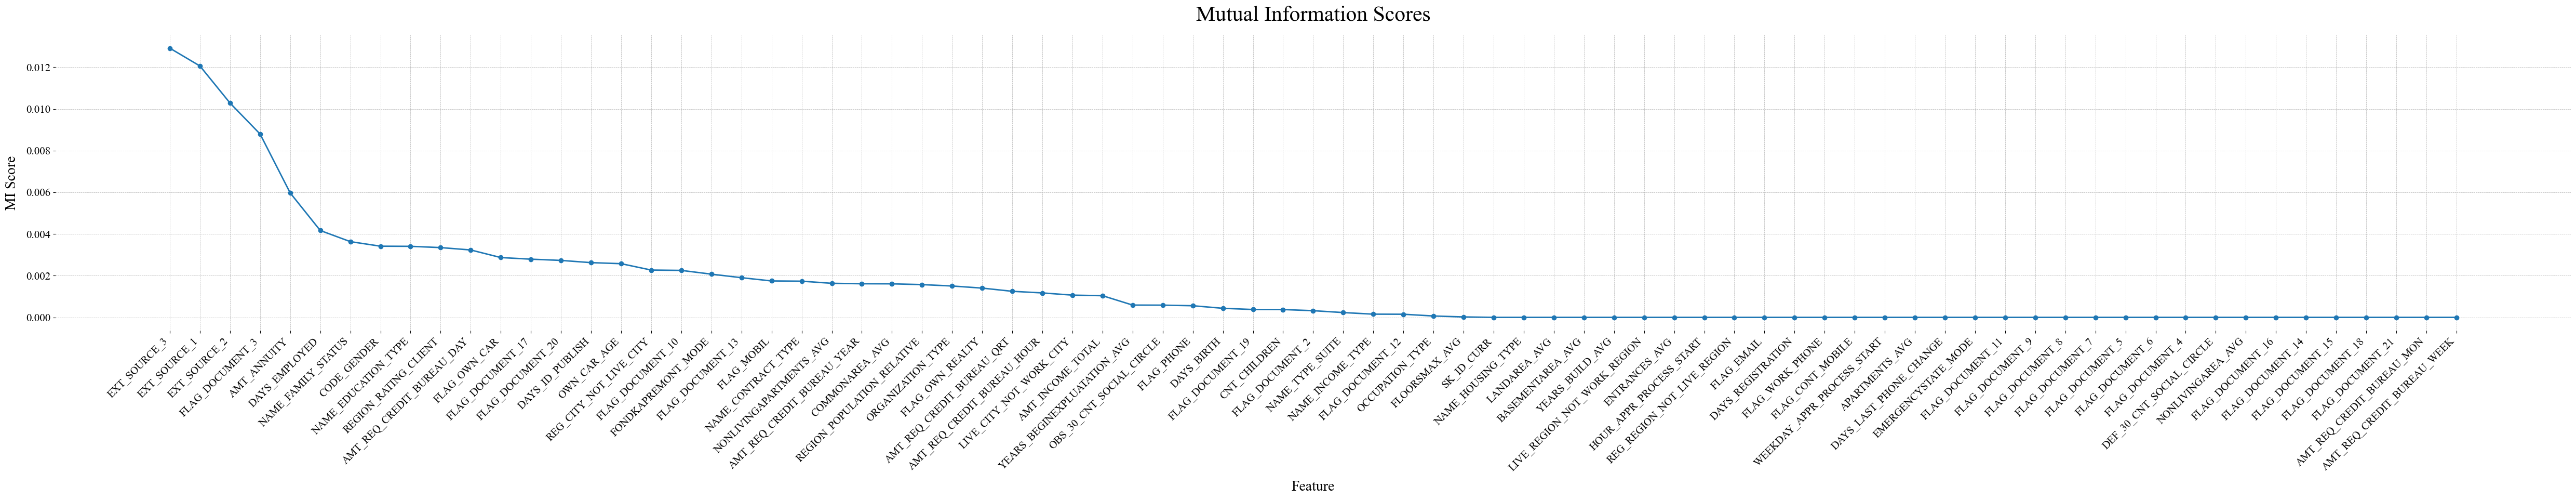

In [ ]:
features = data.drop(columns=['TARGET'])
target = data['TARGET']

features = features.dropna()
target = target[features.index] 
features = pd.get_dummies(features, drop_first=True)

mi_scores = mutual_info_classif(features, target)
functions.create_plot_mi_scores(features, mi_scores)